# Perkenalan

==========================================================================================================================================================

Milestone 2 

Nama  : Ciputra Wangsa

Batch : HCK - 020

Program ini dibuat untuk menemukan model classification yang cocok untuk memprediksi apakah seseorang akan melakukan conversion berdasarkan data yang sudah ada, lalu akan dipilih rekomendasi bisnis berdasarkan hasil prediksi tersebut.

==========================================================================================================================================================

# Pendahuluan

Pada bagian ini berisi tentang topik permasalahan, latar belakang masalah, problem statement menggunakan SMART framework, dan rumusan masalah.

## Topik Permasalahan

Membuat machine learning untuk memprediksi potensi conversion dimasa mendatang.

## Latar Belakang Masalah

PT ABC ingin meningkatkan conversion rate dan mendapatkan ROI yang lebih optimal dari kampanye digital mereka. Salah satu tantangan utama yang dihadapi perusahaan ini adalah memastikan bahwa iklan yang ditampilkan tepat sasaran dan menargetkan audiens yang memiliki potensi tinggi untuk melakukan konversi. Selain itu, PT ABC juga ingin memaksimalkan efektivitas re-targeting terhadap pelanggan yang sudah menunjukkan minat sebelumnya, namun belum melakukan pembelian. Dengan menggunakan data perilaku pelanggan yang telah ada, perusahaan berencana memanfaatkan machine learning untuk memprediksi apakah seorang pelanggan akan melakukan konversi atau tidak. Prediksi ini akan membantu PT ABC dalam mengembangkan strategi digital marketing yang lebih tepat, seperti personalisasi iklan, penawaran yang sesuai, dan memilih saluran kampanye yang efektif. Dengan demikian, PT ABC berharap dapat meningkatkan tingkat konversi dan mengoptimalkan ROI tanpa membuang sumber daya pada upaya pemasaran yang tidak efektif.

## Problem Statement (SMART Framework)

**Specific:** PT ABC ingin meningkatkan conversion rate dan ROI kampanye digital marketing dengan menggunakan model klasifikasi machine learning untuk memprediksi apakah pelanggan akan melakukan konversi.

**Measurable:** Conversion rate meningkat sebesar 15% dan ROI meningkat sebesar 20% dalam 6 bulan, dengan akurasi prediksi konversi minimal 80%.

**Achievable:** Dengan data perilaku pelanggan yang tersedia, perusahaan mampu membangun model klasifikasi dan mengimplementasikannya ke dalam strategi pemasaran.

**Relevant**: Model prediksi klasifikasi cocok digunakan untuk memprediksi apakah seseorang akan melakukan conversion, setelah itu kita bisa menentukan langkah strategis dalam meningkatan conversion rate dan ROI sesuai dengan .

**Time-bound:** Tujuan ini akan dicapai dalam waktu 1 bulan setelah penerapan model machine learning.

**Problem statement:**
Meningkatkan conversion rate sebesar 15% dan ROI sebesar 20% PT ABC dalam 1 bulan dengan menggunakan model klasifikasi machine learning yang mampu memprediksi konversi pelanggan dengan akurasi minimal 80%.

## Rumusan Masalah

1. Campaign channel manakah yang paling banyak menghasilkan konversi?
2. Bagaimana proporsi customer laki-laki atau perempuan yang melakukan conversion?
3. Campaign channel manakah yang adspendnya paling banyak?
4. Kategori usia mana yang paling banyak melakukan conversion?
5. Berapa lama rata-rata waktu yang dihabiskan customer yang convert dan tidak convert selama di website?

# Import Libraries

In [1]:
# Dataframe and Data manipulation libraries
import pandas as pd

# visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTENC

# feature selection
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

# model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# save model
import joblib

# Mengabaikan semua warning
import warnings
warnings.filterwarnings("ignore")

# Data Loading

Pada bagian ini berisi informasi source dataset, import dataset, baris atas dataset, baris bawah dataset, informasi nama kolom dataset, ringkasan informasi dataset, cek missing value dan cek data duplikat.

## Source Dataset

Dataset didapatkan dari **Kaggle** dengan link berikut:
https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data

## Import Dataset

In [2]:
# import csv menggunakan fungsi pd.read_csv()
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

## Baris Atas Dataset

In [3]:
# menampilkan baris atas dataset menggunakan fungsi .head()
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


Dari output diatas didapatkan informasi bahwa dataset memiliki beragam tipe data, dari int, float, dan object. Kolom AdvertisingPlatform dan AdvertisingTool bersifat rahasia sehingga tidak memberikan informasi yang detail.

## Baris Bawah Dataset

In [4]:
# menampilkan baris bawah dataset menggunakan fungsi .tail()
df.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


Dari output datas didapatkan informasi bahwa dataset terisi dengan baik hingga kolom terakhir. Kolom AdvertisingPlatform dan AdvertisingTool bersifat rahasia sehingga tidak memberikan informasi yang detail sehingga nanti akan didrop.

## Informasi Nama Kolom Dataset

In [5]:
# menampilkan nama kolom menggunakan fungssi .columns
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

| Nama kolom                     |                        Deskripsi                                                                          |
|:------------------------------:|:---------------------------------------------------------------------------------------------------------:|
| CustomerID                     | Unique identifier for each customer                                                                       |
| Age                            | Age of the customer                                                                                       |
| Gender                         | Gender of the customer (Male/Female)                                                                      |
| Income                         | Annual income of the customer in USD                                                                      |
| CampaignChannel                | The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral)   |
| CampaignType                   | Type of the marketing campaign (Awareness, Consideration, Conversion, Retention)                          |
| AdSpend                        | Amount spent on the marketing campaign in USD                                                             |
| ClickThroughRate               | Rate at which customers click on the marketing content                                                    |
| ConversionRate                 | Rate at which clicks convert to desired actions (e.g., purchases)                                         |
| AdvertisingPlatform            | Confidential                                                                                              |
| AdvertisingTool                | Confidential                                                                                              |
| WebsiteVisits                  | Number of visits to the website                                                                           |
| PagesPerVisit                  | Average number of pages visited per session                                                               |
| TimeOnSite                     | Average time spent on the website per visit (in minutes)                                                  |
| SocialShares                   | Number of times the marketing content was shared on social media                                          |
| EmailOpens                     | Number of times marketing emails were opened                                                              |
| EmailClicks                    | Number of times links in marketing emails were clicked                                                    |
| PreviousPurchases              | Number of previous purchases made by the customer                                                         |
| LoyaltyPoints                  | Informasi apakah user berlangganan newsletter toko atau tidak                                             |
| Conversion                     | Binary variable indicating whether the customer converted (1) or not (0)                                  |

## Ringkasan Informasi Dataset

In [6]:
# cek summary info dataset menggunakan fungsi .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

Dari output diatas didapatkan informasi bahwa dari dataset terdapat 8000 baris data dengan 20 kolom. Untuk tipe data juga sudah sesuai dengan isi kolomnya.

## Cek Missing Value Dataset

In [7]:
# cek missing value menggunakan fungsi .isna().sum()
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

Dari output diatas didapatkan informasi bahwa tidak ada missing value dari dataset.

## Cek Data Duplikat Dataset

In [8]:
# cek data duplicate menggunakan fungsi .duplicated().sum()
df.duplicated().sum()

0

Dari output diatas didapatkan informasi bahwa tidak ada data duplikat dari dataset.

# Conceptual Problems

## Latar Belakang dan Cara Kerja Bagging

Bagging termasuk dalam ensemble learning, dimana ensemble learning melakukan gabungan beberapa model untuk mendapatkan akurasi prediksi yang lebih baik, mencegah overfitting dan mengurangi varians tanpa menambah bias. Bagging melakukan prediksi data dari beberapa subset data untuk disampling pada model yang sama, lalu hasil prediksi setiap modelnya digabung lalu divoting untuk menentukan hasil prediksi yang tepat dengan memilih hasil prediksi terbanyak. Contoh model bagging: random forest.

## Perbedaan Algoritma Random Forest dan XGboost

Pada program kali ini akan dipilih XGBoost sebagai algoritma boosting.
Random forest menggunakan tipe ensemble learning bagging dimana setiap hasil prediksi subset data yang didapatkan diaggregat atau divoting untuk mendapatkan hasil prediksi akhir, hasil voting terbanyak akan menjadi hasil prediksi. Sedangkan XGBoost menggunakan tipe ensemble learning boosting dimana model dilatih satu per satu, dimana setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya untuk mendapatkan hasil prediksi akhir yang lebih akurat dengan memberikan bobot pada data yang salah.

## Penjelasan Cross Validation

Cross Validation adalah teknik dalam machine learning yang digunakan untuk mengevaluasi kinerja model dengan cara membagi dataset menjadi beberapa subset atau folds dan melatih model pada sebagian data sementara mengujinya pada bagian yang berbeda. Tujuan utama cross validation adalah untuk mengukur seberapa baik model akan bekerja pada data yang belum pernah dilihat sebelumnya dan seberapa jauh perbedaan nilai standar deviasinya dari tiap model, sehingga dapat menghindari masalah overfitting atau underfitting.

# Exploratory Data Analysis (EDA)

Pada bagian ini akan dilakukan drop kolom, pengecekan korelasi, pengecekan distribusi data kolom numerik, dan menjawab pertanyaan dari rumusan masalah.

## Drop Kolom

Kolom AdvertisingPlatform dan AdvertisingTool bersifat rahasia sehingga tidak memberikan informasi yang detail sehingga akan didrop.

In [9]:
# melakukan drop kolom menggunakan fungsi .drop()
df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'], axis=1, inplace=True)

## Memisahkan Kolom Berdasarkan Tipe Data

In [10]:
# memisahkan kolom berdasarkan tipe data categorical atau numerical
unused_col = ['CustomerID']
cat_col = [col for col in df.columns[df.dtypes == 'object']]
num_col = [col for col in df.columns[df.dtypes != 'object'] if col not in unused_col]

print(f'Kolom categorical yang sudah diencode menjadi numerical di dataset: \n{cat_col}\n')
print(f'Kolom numerical di dataset: \n{num_col}')

Kolom categorical yang sudah diencode menjadi numerical di dataset: 
['Gender', 'CampaignChannel', 'CampaignType']

Kolom numerical di dataset: 
['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']


## Cek Distribusi Data

In [11]:
# melakukan pengecekan skewness kolom numerical dataset menggunakan looping dan fungsi .skew()
for col in num_col:
    skewness = df[col].skew()
    print(f'Skewness kolom {col}: {skewness}')

Skewness kolom Age: -0.004916459562315591
Skewness kolom Income: -0.01129802398913965
Skewness kolom AdSpend: 0.019224263668873816
Skewness kolom ClickThroughRate: 0.011066343354481298
Skewness kolom ConversionRate: 0.012777378917427484
Skewness kolom WebsiteVisits: -0.017139409597601508
Skewness kolom PagesPerVisit: -0.01250956807847936
Skewness kolom TimeOnSite: 0.014609689622807022
Skewness kolom SocialShares: -0.011357202764970407
Skewness kolom EmailOpens: 0.007678837983407652
Skewness kolom EmailClicks: 0.023365585107531475
Skewness kolom PreviousPurchases: 0.005711804932519361
Skewness kolom LoyaltyPoints: 0.016303469902627047
Skewness kolom Conversion: -2.2891116692161186


Dari output diatas didapatkan informasi bahwa ada kolom yang distribusi datanya normal dan tidak normal. Dari perbedaan tersebut selanjutnya akan dikelompokkan menjadi 2 variabel yang berbeda karena akan berbeda cara handlingnya.

In [12]:
# variabel dengan isi kolom yang distribusi datanya normal
approx_sym = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

# variabel dengan isi kolom yang distribusi datanya tidak normal
skew = ['Conversion']

## Korelasi Antar-kolom Numerik

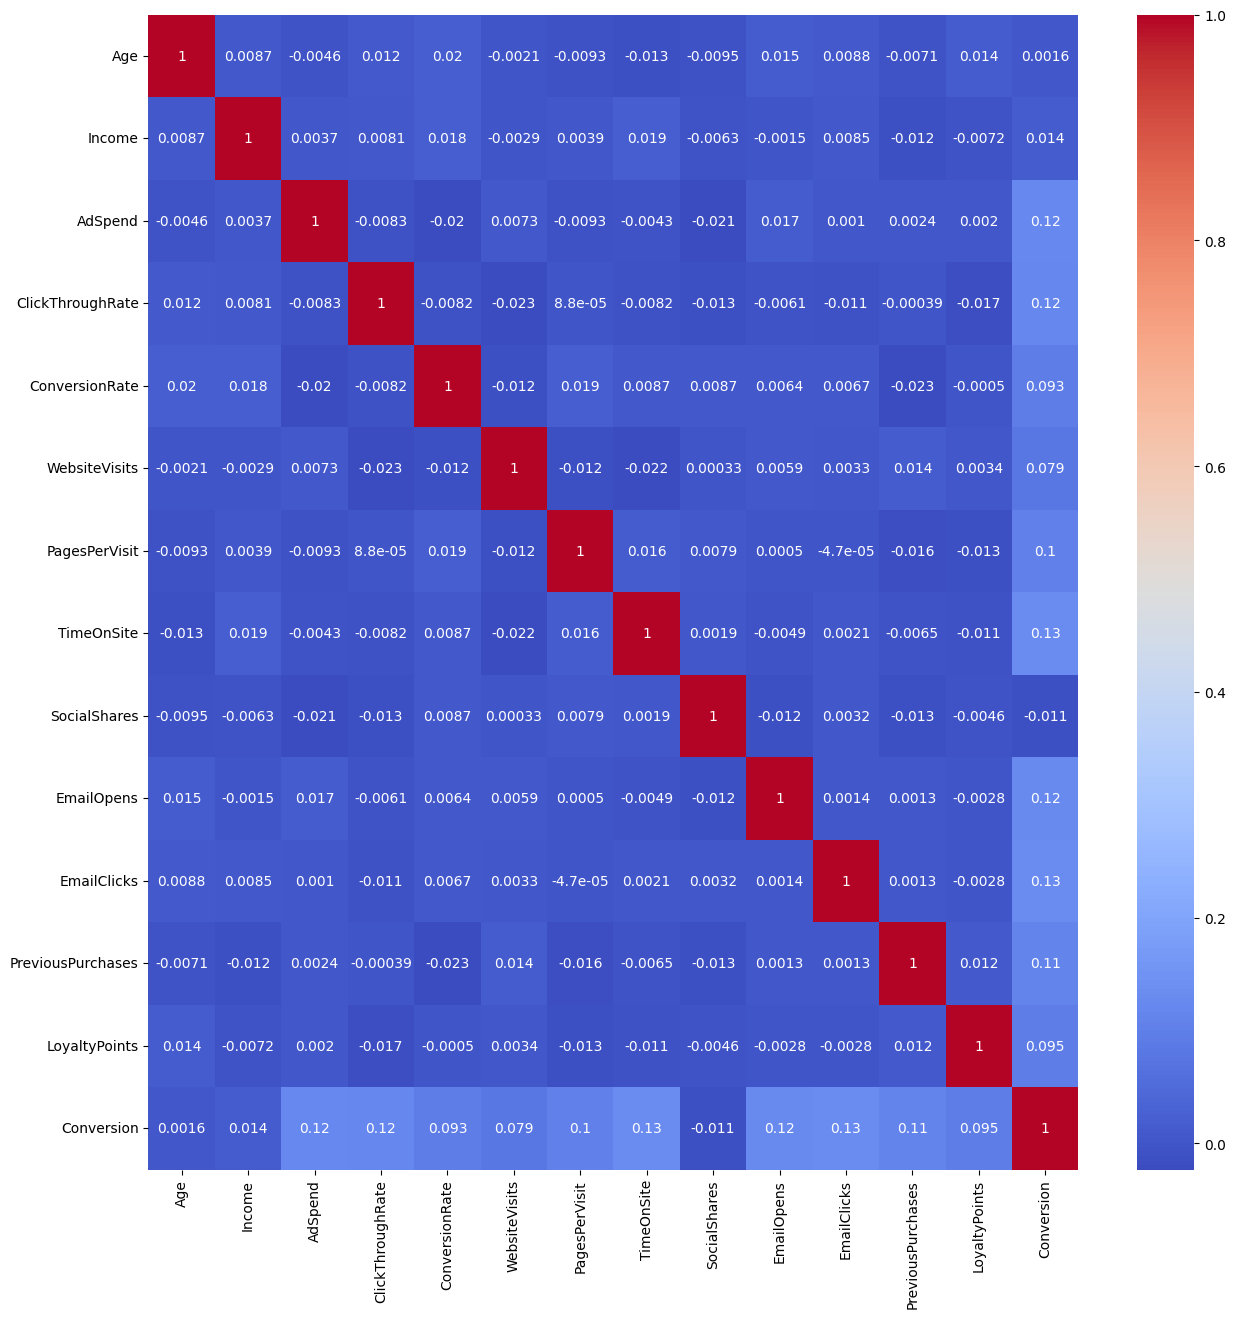

In [13]:
# membuat size canvas
plt.figure(figsize=(15, 15))

# Membuat heatmap
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')

# menampilkan heatmap
plt.show()

Dari output diatas didapatkan informasi bahwa antar kolom numerikal tidak memiliki korelasi yang signifikan, hanya kolom conversion yang memiliki korelasi dengan kolom numerikal selain kolom age, income, dan socialshares walaupun sangat lemah.

## Cek Cardinality

In [14]:
# looping untuk melihat cardinality masing-masing kolom categorical
for col in cat_col:
  print(f'Cardinality kolom {col}:', df[col].nunique())

Cardinality kolom Gender: 2
Cardinality kolom CampaignChannel: 5
Cardinality kolom CampaignType: 4


Dari output diatas didapatkan informasi bahwa cardinality kolom categorical masih tergolong baik.

## Cek Komposisi Jumlah Target Class

In [15]:
# groupby class target
ytar = df.groupby('Conversion').size().reset_index(name='total')

fig = px.bar(ytar, x='Conversion', y='total', 
             color='Conversion',
             color_discrete_sequence=['green', 'blue', 'purple', 'brown', 'orange'],
             title='Komposisi Class Target')

# Mengubah judul axis x dan y dan beberapa layout menggunakan fungsi .update_layout()
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Jumlah',
    title_x=0.5
)

# Menampilkan diagram
fig.show()
# print(f'Target data pada y_train:\n {ytar}\n')

Dari output diatas didapatkan informasi bahwa jumlah class 1 lebih banyak 7.13 kali lipat dibandingkan class 0. Sehingga nanti akan dilakukan data balancing agar model tidak menjadi bias dalam melakukan prediksi dari data train.

## Campaign Channel yang Paling Banyak Menghasilkan Konversi

In [16]:
# membuat variabel baru dengan data customer yang melakukan conversion
df_convert = df[df['Conversion'] == 1]

# groupby campaign channel
df_counts = df_convert.groupby('CampaignChannel').size().reset_index(name='counts')

# membuat pie chart menggunakan plotly
fig = px.pie(df_counts, values='counts', names='CampaignChannel', title='Proporsi Conversion Berdasarkan Campaign Channel')
fig.update_layout(title_x = 0.5)

# menampilkan pie chart
fig.show()

Dari output didapatkan informasi bahwa hasil conversion terbanyak didapatkan dari campaign channel referral sebanyak 21.6%, dari PPC sebanyak 20.8%, SEO dan Email tidak terlalu berbeda jauh dengan selisih 0.1% lalu paling kecil didapatkan dari channel social media.

## Proporsi Conversion dari Customer Pria dan Wanita

In [17]:
# groupby gender
df_counts = df_convert.groupby('Gender').size().reset_index(name='counts')

# membuat pie chart menggunakan plotly
fig = px.pie(df_counts, values='counts', names='Gender', title='Proporsi Conversion Berdasarkan Gender')
fig.update_layout(title_x = 0.5)

# menampilkan pie chart
fig.show()

Berdasarkan output diatas, didapatkan informasi bahwa gender yang paling banyak melakukan conversion adalah wanita dengan proporsi 60.5% dan pria dengan porsi 39.5%

## Adspend Masing-masing Campaign Channel

In [18]:
# groupby campaign channel
df_adspend = df.groupby('CampaignChannel')['AdSpend'].sum().reset_index(name='total')

top_channel = df_adspend.sort_values(by='total', ascending=False)

fig = px.bar(top_channel, x='CampaignChannel', y='total', 
             color='CampaignChannel',
             color_discrete_sequence=['green', 'blue', 'purple', 'brown', 'orange'],
             title='Total AdSpend Setiap Campaign Channel')

# Mengubah judul axis x dan y dan beberapa layout menggunakan fungsi .update_layout()
fig.update_layout(
    xaxis_title='Channel Campaign',
    yaxis_title='Total Ad Spend',
    title_x=0.5
)

# Menampilkan diagram
fig.show()

Dari output diatas didapatkan informasi bahwa channel referral dan PPC menghabiskan adspend terbanyak tetapi hasil conversionnya juga maksimal jika dilihat dari pie chart sebelumnya, tetapi channel Email sedikit tidak efektif dalam penggunaan adspend karena hasil conversion dari channel Email masih dibawah channel SEO walaupun berbeda tipis. Lalu jika dilihat dari total adspend channel social media juga harus dimaksimalkan.

## Kategori Usia yang Paling Banyak Melakukan Conversion

In [19]:
bins = [18, 30, 40, 50, 60, 69]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
df_convert['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)
# Menghitung jumlah untuk setiap kategori
age_counts = df_convert['AgeGroup'].value_counts().reset_index()
age_counts.columns = ['AgeGroup', 'Counts']

# Membuat pie chart menggunakan plotly
fig = px.pie(age_counts, values='Counts', names='AgeGroup', title='Distribusi Usia')
fig.update_layout(title_x=0.5)

# Menampilkan pie chart
fig.show()

Dari output diatas didapatkan informasi bahwa kebanyakan kategori usia yang melakukan conversion adalah kategori usia 18-29 sebanyak 22.5%, untuk kategori usia 30-39 dan 40-49 memiliki selisih 0.3%, kategori usia 50-59 sebanyak 19.2% dan paling rendah dari kategori usia 60-69 sebesar 17.9%.

## Rata-rata Waktu yang Dihabiskan Customer yang Convert dan Tidak Selama di Website

In [20]:
# groupby conversion dan nilai rata-rata time on site
df_time = df.groupby('Conversion')['TimeOnSite'].mean().reset_index(name='mean')

# rename nilai 0 = not converted dan 1 = converted
df_time['Conversion'] = df_time['Conversion'].map({0: 'Not Converted', 1: 'Converted'})

# membuat diagram
top_onsite = df_time.sort_values(by='mean', ascending=False)
fig = px.bar(top_onsite, x='Conversion', y='mean', 
             color='Conversion',
             color_discrete_sequence=['green', 'blue'],
             title='Rata-rata Time On Site Customer yang Convert dan Tidak Convert')

# Mengubah judul axis x dan y dan beberapa layout menggunakan fungsi .update_layout()
fig.update_layout(
    xaxis_title='Status Conversion',
    yaxis_title='Time On Site',
    title_x=0.5
)

# Menampilkan diagram
fig.show()

Dari output diatas didapatkan informasi bahwa customer yang melakukan conversion memang rata-rata time on sitenya lebih tinggi dibandingkan customer yang tidak convert dengan perbedaan waktu rata-rata hampir 2 menit.

# Feature Engineering

Pada bagian ini akan dilakukan splitting data untuk keperluan model inference, training dan test, handling outlier, cek korelasi antara fitur dengan target, dan drop kolom fitur yang tidak memiliki korelasi dengan target.

## Split Data

Data akan didrop 10 baris dari belakang untuk digunakan sebagai data inference, lalu kolom target akan dipisahkan.

In [21]:
# drop 10 baris terakhir
df = df.iloc[:-10]

In [22]:
# set x dan y (x adalah fitur atau parameter, y adalah target atau hasilnya)
X = df.drop(['Conversion'], axis=1)
y = df['Conversion']

## Split Train set dan Test set

In [23]:
#pisahkan menjadi train dan test dengan porsi train 85% dan test 15%
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.15,
                                                  random_state=42
                                                   )

## Handling Outlier

In [24]:
def calculate_boundaries_and_outliers(df, columns, threshold=3):
    """
    Fungsi ini dibuat untuk menghitung upper boundary, lower boundary, dan persentase outlier untuk kolom yang distribusi datanya normal
    """
    results = {
        'Lower Boundary': [],
        'Upper Boundary': [],
        'Outlier Percentage': []
    }

    for column in columns:
        if column in df.columns:
            # Hitung z-score
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            
            # Hitung lower dan upper boundary
            lower_boundary = df[column].mean() - threshold * df[column].std()
            upper_boundary = df[column].mean() + threshold * df[column].std()
            
            # Hitung persentase outlier
            outliers = ((z_scores < -threshold) | (z_scores > threshold)).sum()
            outlier_percentage = (outliers / len(df[column])) * 100
            
            # Simpan hasil
            results['Lower Boundary'].append(lower_boundary)
            results['Upper Boundary'].append(upper_boundary)
            results['Outlier Percentage'].append(outlier_percentage)
        else:
            # Jika kolom tidak ada, tambahkan None
            results['Lower Boundary'].append(None)
            results['Upper Boundary'].append(None)
            results['Outlier Percentage'].append(None)

    return pd.DataFrame(results, index=columns)

In [25]:
# menampilkan hasil perhitungan upper boundary, lower boundary dan persentase outlier dari masing-masing kolom
result = calculate_boundaries_and_outliers(X_train, approx_sym, 3)
result

,Lower Boundary,Upper Boundary,Outlier Percentage
Age,-1.213864,88.507340,0.0
Income,-28410.961363,197485.217879,0.0
AdSpend,-3531.560218,13550.698585,0.0
ClickThroughRate,-0.097781,0.407613,0.0
ConversionRate,-0.061277,0.269002,0.0
WebsiteVisits,-18.288508,67.657673,0.0
PagesPerVisit,-2.280009,13.398242,0.0
TimeOnSite,-4.987727,20.445096,0.0
SocialShares,-36.587534,136.697090,0.0
EmailOpens,-7.710995,26.608065,0.0


Karena tidak ada outlier, dan distribusi data yang tidak normal ada pada target. Maka handling outlier tidak dilakukan.

## Cek Korelasi Fitur dan Target

In [26]:
# memisahkan kolom kategorikal dan numerikal
cat_cols = ['Gender', 'CampaignChannel', 'CampaignType']
num_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

In [27]:
# melakukan perubahan tipe data kolom garage sebelum dilakukan uji korelasi metode kendall dengan kolom target (kategorikal-numerikal)
for i in num_cols:
    corr = X_train[i].astype('category').cat.codes

    # melakukan uji korelasi kendall untuk mendapatkan hasil nilai korelasi dan p-value
    tau, p_value = kendalltau(y_train, corr)

    # menampilkan hasil nilai korelasi dan p-value
    print(f"Hasil uji korelasi Kendall kolom {i} dengan kolom Conversion:")
    print(f"Kendall's tau: {tau}")
    print(f"P-value: {p_value}\n")

Hasil uji korelasi Kendall kolom Age dengan kolom Conversion:
Kendall's tau: -0.004084669037302159
P-value: 0.6830611073728383

Hasil uji korelasi Kendall kolom Income dengan kolom Conversion:
Kendall's tau: 0.017096819636194277
P-value: 0.08447502897549766

Hasil uji korelasi Kendall kolom AdSpend dengan kolom Conversion:
Kendall's tau: 0.09683256440592183
P-value: 1.4893668208654475e-22

Hasil uji korelasi Kendall kolom ClickThroughRate dengan kolom Conversion:
Kendall's tau: 0.10202863048240092
P-value: 7.341497646885622e-25

Hasil uji korelasi Kendall kolom ConversionRate dengan kolom Conversion:
Kendall's tau: 0.08236636943383234
P-value: 9.420978180143771e-17

Hasil uji korelasi Kendall kolom WebsiteVisits dengan kolom Conversion:
Kendall's tau: 0.06291805874876975
P-value: 3.241284599203556e-10

Hasil uji korelasi Kendall kolom PagesPerVisit dengan kolom Conversion:
Kendall's tau: 0.08069785467486362
P-value: 3.8404631521340484e-16

Hasil uji korelasi Kendall kolom TimeOnSite de

In [28]:
# melakukan looping untuk menghitung nilai korelasi menggunakan chi-squared
for col in cat_cols:
        # Membuat tabel kontingensi untuk setiap kolom di cat_cols dengan kolom target Y
        contingency_table = pd.crosstab(X_train[col], y_train)

        # Melakukan uji Chi-squared
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Meampilkan hasil uji korelasi chi-squared
        print(f"Hasil uji korelasi Chi-squared kolom {col} dengan kolom Conversion:")
        print(f"Chi-squared Statistic: {chi2_stat:.2f}")
        print(f"P-value: {p_value:.4f}\n")

Hasil uji korelasi Chi-squared kolom Gender dengan kolom Conversion:
Chi-squared Statistic: 0.00
P-value: 0.9697

Hasil uji korelasi Chi-squared kolom CampaignChannel dengan kolom Conversion:
Chi-squared Statistic: 3.50
P-value: 0.4779

Hasil uji korelasi Chi-squared kolom CampaignType dengan kolom Conversion:
Chi-squared Statistic: 72.19
P-value: 0.0000



Berdasarkan uji korelasi diatas, maka kolom yang akan dipakai adalah CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, EmailOpens, EmailClicks, PreviousPurchases, dan LoyaltyPoints.

## Drop Fitur yang Tidak Ada Korelasi

In [29]:
# drop kolom menggunakan fungsi .drop(columns=)
X_train.drop(columns=['CustomerID', 'Age', 'Income', 'Gender', 'CampaignChannel'], inplace=True)
X_test.drop(columns=['CustomerID', 'Age', 'Income', 'Gender', 'CampaignChannel'], inplace=True)

## Preprocessing Pipeline

In [30]:
# membuat pipeline untuk kolom kategorikal
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# membuat pipeline untuk kolom numerikal
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# memisahkan kolom berdasarkan tipe data categorical atau numerical
cat_cols = ['CampaignType']
num_cols = ['AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'SocialShares','TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

# melakukan column transformer kedalam pipeline yang sesuai berdasarkan fitur yang digunakan
preproc_pipeline= ColumnTransformer([
        ('num_col', num_pipeline, num_cols),
        ('cat_col',cat_pipeline, cat_cols)
    ],
    remainder='passthrough',
    verbose=True)

# cek struktur proses pipeline
preproc_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_col',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['AdSpend', 'ClickThroughRate',
                                  'ConversionRate', 'WebsiteVisits',
                                  'PagesPerVisit', 'SocialShares', 'TimeOnSite',
                                  'EmailOpens', 'EmailClicks',
                                  'PreviousPurchases', 'LoyaltyPoints']),
                                ('cat_col',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['CampaignType'])],
                  verbose=True)

## Data Balancing

Karena target class tidak balance, maka akan dilakukan data balancing menggunakan SMOTENC agar model tidak bias dalam melakukan prediksi data.

In [31]:
# balancing data
smote = SMOTENC([0], random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

Conversion
0    5958
1    5958
Name: count, dtype: int64

## Preprocessing

In [32]:
# melakukan preprocessing berdasarkan pipeline dan melakukan fit & transform ke data X_train
X_train_prep = preproc_pipeline.fit_transform(X_train_balanced)

# melakukan preprocessing berdasarkan pipeline dan melakukan transform ke data X_train
X_test_prep = preproc_pipeline.transform(X_test)

[ColumnTransformer] ....... (1 of 2) Processing num_col, total=   0.0s
[ColumnTransformer] ....... (2 of 2) Processing cat_col, total=   0.0s


In [33]:
X_train_balanced.shape

(11916, 12)

In [34]:
X_train_prep.shape

(11916, 15)

# Model Definition

Dalam hal ini bisa dikategorikan bahwa:

Class 0 didefinisikan sebagai class negative: Class yang customer tidak diprediksi melakukan conversion

Class 1 didefinisikan sebagai class positive: Class yang customer diprediksi melakukan conversion

Karena ingin memaksimalkan conversion, maka penilaian model akan lebih menitikberatkan pada nilai recall, agar kesalahan prediksi customer yang tidak convert ternyata aktualnya akan melakukan conversion lebih minim terjadi sehingga strategi bisnis yang dibuat akan lebih efektif. Pada program ini akan diuji menggunakan model KNN, SVM, Decision Tree, Random Forest, dan XGBoost.

## K-Nearest Neighbors

KNN adalah algoritma pembelajaran non-parametrik yang bisa digunakan untuk klasifikasi dan regresi. Model ini mengklasifikasikan data baru berdasarkan mayoritas kelas dari K tetangga terdekat. Jumlah K disarankan bernilai ganjil dan pada program ini akan digunakan algoritma KNN classifier.

### Hyperparameter

- K (jumlah tetangga): Menentukan berapa banyak tetangga terdekat yang dipertimbangkan. K yang kecil bisa membuat model menjadi overfitting, sedangkan K yang besar dapat mengakibatkan underfitting.

- Distance metric (jarak): Memilih metode pengukuran jarak, seperti euclidean atau manhattan.

### Metrics

- Akurasi: Proporsi prediksi yang dengan jumlah target class yang seimbang.
- Precision: Nilai yang menunjukkan seberapa sering memprediksi nilai positif dari nilai aktual yang positif.
- Recall: Nilai yang menunjukkan seberapa sering nilai aktual yang positif diprediksi negatif.
- F1-Score: Rata-rata nilai yang seimbang dari precision dan recall, berguna ketika ada ketidakseimbangan kelas.
- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

`Pada program ini akan fokus dengan nilai recall`

## SVM 

SVM adalah algoritma klasifikasi yang berusaha menemukan hyperplane optimal untuk memisahkan class. SVM efektif dalam dimensi tinggi dan dapat digunakan untuk data non-linear, tetapi kurang cocok digunakan jika baris data terlalu banyak.

### Hyperparameter

- C (parameter regularisasi): Mengontrol trade-off antara margin yang lebar dan kesalahan klasifikasi. Nilai besar untuk C menghasilkan margin yang lebih sempit.
- Kernel: Fungsi yang digunakan untuk mengubah data ke dimensi yang lebih tinggi, misalnya linear, polynomial, atau RBF.
- Gamma: Untuk kernel RBF, gamma mengontrol seberapa jauh margin antara supervector dengan hyperplane.
- Degree: Untuk kernel polynomial, digunakan jika data tidak linear, semakin besar degree akan menyebabkan overfitting.

### Metrics

- Akurasi: Proporsi prediksi yang dengan jumlah target class yang seimbang.
- Precision: Nilai yang menunjukkan seberapa sering memprediksi nilai positif dari nilai aktual yang positif.
- Recall: Nilai yang menunjukkan seberapa sering nilai aktual yang positif diprediksi negatif.
- F1-Score: Rata-rata nilai yang seimbang dari precision dan recall, berguna ketika ada ketidakseimbangan kelas.
- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

`Pada program ini akan fokus dengan nilai recall`

## Decision Tree

Decision Tree adalah model yang membagi dataset menjadi beberapa subset berdasarkan fitur untuk menghasilkan keputusan. Setiap cabang mewakili keputusan berdasarkan fitur, dan setiap daun mewakili hasil akhir.

### Hyperparameter

- Max Depth: Kedalaman maksimum pohon, mencegah overfitting.
- Min Samples Split: Minimum jumlah sampel yang diperlukan untuk membagi node. Mencegah pembagian yang terlalu kecil.
- Min Samples Leaf: Minimum jumlah sampel yang harus ada di daun. Membantu mengurangi noise.
- Max Leaf Nodes: Maximal jumlah daun yang ada pada pohon

### Metrics

- Akurasi: Proporsi prediksi yang dengan jumlah target class yang seimbang.
- Precision: Nilai yang menunjukkan seberapa sering memprediksi nilai positif dari nilai aktual yang positif.
- Recall: Nilai yang menunjukkan seberapa sering nilai aktual yang positif diprediksi negatif.
- F1-Score: Rata-rata nilai yang seimbang dari precision dan recall, berguna ketika ada ketidakseimbangan kelas.
- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

`Pada program ini akan fokus dengan nilai recall`

## Random Forest

Random Forest adalah salah satu contoh ensemble learning tipe bagging dari banyak Decision Trees, yang mengurangi risiko overfitting dengan menggabungkan hasil dari beberapa pohon. Setiap pohon dilatih dengan subset acak dari data dan fitur lalu divoting untuk menentukan hasil akhir.

### Hyperparameter

- N Estimators: Jumlah pohon dalam hutan. Lebih banyak pohon dapat meningkatkan akurasi, tetapi juga proses komputasinya jadi lebih lama.
- Min Samples Split: Minimum jumlah sampel yang diperlukan untuk membagi node. Mencegah pembagian yang terlalu kecil.
- Min Samples Leaf: Minimum jumlah sampel yang harus ada di daun. Membantu mengurangi noise.
- Max Leaf Nodes: Maximal jumlah daun yang ada pada pohon.
- Max features: Jumlah maksimal fitur/variabel untuk memprediksi label/target. Max_features membatasi jumlah untuk memilih fitur maksimum di setiap pohon. 

### Metrics

- Akurasi: Proporsi prediksi yang dengan jumlah target class yang seimbang.
- Precision: Nilai yang menunjukkan seberapa sering memprediksi nilai positif dari nilai aktual yang positif.
- Recall: Nilai yang menunjukkan seberapa sering nilai aktual yang positif diprediksi negatif.
- F1-Score: Rata-rata nilai yang seimbang dari precision dan recall, berguna ketika ada ketidakseimbangan kelas.
- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

`Pada program ini akan fokus dengan nilai recall`

## XGBoost

XGBoost adalah algoritma machine learning yang berbasis pada teknik boosting dalam ensemble learning. Secara default model ini menggunakan konsep seperti decision tree, dari hasil prediksi model sebelumnya akan diberikan bobot pada mode yang salah, lalu dari kesalahan model sebelumnya akan dilakukan perhitungan untuk menghasilkan prediksi yang lebih akurat dan stabil.

### Hyperparameter

- N_estimators: Jumlah pohon yang akan dibangun. Lebih banyak pohon dapat meningkatkan akurasi, tetapi juga meningkatkan risiko overfitting.
- Learning_rate (eta): Mengontrol seberapa besar kontribusi setiap pohon ke model akhir. Nilai yang lebih kecil (misalnya, 0.01) membuat model lebih stabil tetapi memerlukan lebih banyak pohon untuk konvergensi.
- Max_depth: Kedalaman maksimum dari setiap pohon. Nilai yang lebih dalam dapat menangkap pola yang akurat tetapi juga meningkatkan risiko overfitting.
- Subsample: Proporsi dari data yang digunakan untuk membangun setiap pohon. Menggunakan nilai kurang dari 1.0 dapat membantu mengurangi overfitting.
- Colsample_bytree: Proporsi fitur yang dipilih secara acak untuk setiap pohon. Memungkinkan pemilihan fitur yang lebih baik dan mengurangi overfitting.
- Gamma (min_split_loss): Mengontrol kompleksitas pohon. Menentukan minimum loss reduction yang diperlukan untuk membagi node. Semakin besar nilainya, semakin konservatif model.
- Reg_alpha dan reg_lambda: Parameter regularisasi L1 (Lasso) dan L2 (Ridge) untuk mengurangi kompleksitas model dan mencegah overfitting.

### Metrics

- Akurasi: Proporsi prediksi yang dengan jumlah target class yang seimbang.
- Precision: Nilai yang menunjukkan seberapa sering memprediksi nilai positif dari nilai aktual yang positif.
- Recall: Nilai yang menunjukkan seberapa sering nilai aktual yang positif diprediksi negatif.
- F1-Score: Rata-rata nilai yang seimbang dari precision dan recall, berguna ketika ada ketidakseimbangan kelas.
- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

`Pada program ini akan fokus dengan nilai recall`

# Model Training

Model training akan menggunakan default parameter, dan cross validation akan menggunakan 3 folds.

## K-Nearest Neighbors

In [35]:
# mendefinisikan model KNN
knn = KNeighborsClassifier()

# melakukan fit model terhadap data train
knn.fit(X_train_prep, y_train_balanced)

KNeighborsClassifier()

In [36]:
# melakukan predict pada target data train
y_pred_train_knn = knn.predict(X_train_prep)

# melakukan predict pada target data test
y_pred_test_knn = knn.predict(X_test_prep)

### Cross Validation KNN

In [37]:
# melakukan cross validation dengan 5 fold pada model KNN
recall_val_knn = cross_val_score(knn,
                                     X_train_prep,
                                     y_train_balanced,
                                     cv=3,
                                     scoring="recall")

## SVM 

In [38]:
# mendefinisikan model SVC
svm = SVC(random_state=42)

# melakukan fit model terhadap data train
svm.fit(X_train_prep, y_train_balanced)

SVC(random_state=42)

In [39]:
# melakukan predict pada target data train
y_pred_train_svm = svm.predict(X_train_prep)

# melakukan predict pada target data test
y_pred_test_svm = svm.predict(X_test_prep)

### Cross Validation SVM

In [40]:
# melakukan cross validation dengan 5 fold pada model SVM
recall_val_svm = cross_val_score(svm,
                                     X_train_prep,
                                     y_train_balanced,
                                     cv=3,
                                     scoring="recall")

## Decision Tree

In [41]:
# mendefinisikan model decision tree
detree = DecisionTreeClassifier(random_state=42)

# melakukan fit model terhadap data train
detree.fit(X_train_prep, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [42]:
# melakukan predict pada target data train
y_pred_train_detree = detree.predict(X_train_prep)

# melakukan predict pada target data test
y_pred_test_detree = detree.predict(X_test_prep)

### Cross Validation Decision Tree

In [43]:
# melakukan cross validation dengan 5 fold pada model decision tree
recall_val_detree = cross_val_score(detree,
                                     X_train_prep,
                                     y_train_balanced,
                                     cv=3,
                                     scoring="recall")

## Random Forest

In [44]:
# mendefinisikan model random forest
ranfor = RandomForestClassifier(random_state=42)

# melakukan fit model terhadap data train
ranfor.fit(X_train_prep, y_train_balanced)

RandomForestClassifier(random_state=42)

In [45]:
# melakukan predict pada target data train
y_pred_train_ranfor = ranfor.predict(X_train_prep)

# melakukan predict pada target data test
y_pred_test_ranfor = ranfor.predict(X_test_prep)

### Cross Validation Random Forest

In [46]:
# melakukan cross validation dengan 5 fold pada model random forest
recall_val_ranfor = cross_val_score(ranfor,
                                     X_train_prep,
                                     y_train_balanced,
                                     cv=3,
                                     scoring="recall")

## XGBoost

In [47]:
# mendefinisikan model XGBoost
xgb = XGBClassifier(random_state=42)

# melakukan fit model terhadap data train
xgb.fit(X_train_prep, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
# melakukan predict pada target data train
y_pred_train_xgb = xgb.predict(X_train_prep)

# melakukan predict pada target data test
y_pred_test_xgb = xgb.predict(X_test_prep)

### Cross Validation XGBoost

In [49]:
# melakukan cross validation dengan 5 fold pada model XGBoost
recall_val_xgb = cross_val_score(xgb,
                                     X_train_prep,
                                     y_train_balanced,
                                     cv=3,
                                     scoring="recall")

# Model Evaluation

Pada bagian ini akan dilakukan evaluasi berdasarkan metrics recall dari classification report, confussion matrix dan nilai cross validation dari masing-masing model yang sudah digunakan sebelumnya.

## Evaluasi dari Classification Report Setiap Model

In [50]:
# Dictionary berisi nama model dan hasil classification_report untuk train dan test
classification_reports = {
    'KNN': {'train': classification_report(y_train_balanced, y_pred_train_knn, output_dict=True),
            'test': classification_report(y_test, y_pred_test_knn, output_dict=True)},
    'SVM': {'train': classification_report(y_train_balanced, y_pred_train_svm, output_dict=True),
            'test': classification_report(y_test, y_pred_test_svm, output_dict=True)},
    'Decision Tree': {'train': classification_report(y_train_balanced, y_pred_train_detree, output_dict=True),
                      'test': classification_report(y_test, y_pred_test_detree, output_dict=True)},
    'Random Forest': {'train': classification_report(y_train_balanced, y_pred_train_ranfor, output_dict=True),
                      'test': classification_report(y_test, y_pred_test_ranfor, output_dict=True)},
    'XGBoost': {'train': classification_report(y_train_balanced, y_pred_train_xgb, output_dict=True),
                'test': classification_report(y_test, y_pred_test_xgb, output_dict=True)}
}

# Inisialisasi DataFrame untuk menyimpan metrik evaluasi
model_metrics = pd.DataFrame()

# Looping untuk setiap model dan dataset (train/test)
for model_name, reports in classification_reports.items():
    for dataset_type in ['train', 'test']:
        # Mengambil hasil untuk setiap kelas 0 dan 1, serta macro avg dan weighted avg
        model_metrics[f'{model_name} {dataset_type}'] = [
            reports[dataset_type]['0']['precision'],   # Precision Kelas 0
            reports[dataset_type]['1']['precision'],   # Precision Kelas 1
            reports[dataset_type]['0']['recall'],      # Recall Kelas 0
            reports[dataset_type]['1']['recall'],      # Recall Kelas 1
            reports[dataset_type]['0']['f1-score'],    # F1-Score Kelas 0
            reports[dataset_type]['1']['f1-score'],    # F1-Score Kelas 1
            reports[dataset_type]['accuracy'],         # Accuracy
            reports[dataset_type]['macro avg']['precision'],  # Precision Macro Avg
            reports[dataset_type]['macro avg']['recall'],     # Recall Macro Avg
            reports[dataset_type]['macro avg']['f1-score'],   # F1-Score Macro Avg
            reports[dataset_type]['weighted avg']['precision'],  # Precision Weighted Avg
            reports[dataset_type]['weighted avg']['recall'],     # Recall Weighted Avg
            reports[dataset_type]['weighted avg']['f1-score']    # F1-Score Weighted Avg
        ]

# Menambahkan index untuk setiap metrik
model_metrics.index = [
    'Precision Class 0', 'Precision Class 1',
    'Recall Class 0', 'Recall Class 1',
    'F1-Score Class 0', 'F1-Score Class 1',
    'Accuracy', 'Precision Macro Avg', 
    'Recall Macro Avg', 'F1-Score Macro Avg', 
    'Precision Weighted Avg', 'Recall Weighted Avg', 
    'F1-Score Weighted Avg'
]

# Tampilkan DataFrame
model_metrics


,KNN train,KNN test,SVM train,SVM test,Decision Tree train,Decision Tree test,Random Forest train,Random Forest test,XGBoost train,XGBoost test
Precision Class 0,0.814606,0.214118,0.856457,0.303371,1.0,0.235495,1.0,0.381443,0.983930,0.394231
Precision Class 1,0.992465,0.925065,0.866406,0.927039,1.0,0.911700,1.0,0.925373,0.996769,0.932392
Recall Class 0,0.994126,0.610738,0.868244,0.543624,1.0,0.463087,1.0,0.496644,0.996811,0.550336
Recall Class 1,0.773750,0.681905,0.854481,0.822857,1.0,0.786667,1.0,0.885714,0.983719,0.880000
F1-Score Class 0,0.895457,0.317073,0.862310,0.389423,1.0,0.312217,1.0,0.431487,0.990328,0.459384
F1-Score Class 1,0.869565,0.785088,0.860402,0.871847,1.0,0.844581,1.0,0.905109,0.990201,0.905439
Accuracy,0.883938,0.673061,0.861363,0.788157,1.0,0.746455,1.0,0.837364,0.990265,0.839033
Precision Macro Avg,0.903535,0.569591,0.861431,0.615205,1.0,0.573597,1.0,0.653408,0.990349,0.663311
Recall Macro Avg,0.883938,0.646322,0.861363,0.683241,1.0,0.624877,1.0,0.691179,0.990265,0.715168
F1-Score Macro Avg,0.882511,0.551080,0.861356,0.630635,1.0,0.578399,1.0,0.668298,0.990265,0.682411


**Insight per model:**
- Model KNN:
    - Train: Precision Class 0 (0.815) dan Class 1 (0.992) menunjukkan performa yang baik, dengan recall Class 0 yang sangat tinggi (0.994) tetapi recall Class 1 yang lebih rendah (0.774).
    - Test: Precision Class 0 menurun drastis (0.214), sementara precision Class 1 tetap baik (0.925). Recall Class 0 juga menurun signifikan menjadi 0.611, dan recall Class 1 turun ke 0.682.
    - Kesimpulan: KNN menunjukkan performa yang tidak stabil pada data test, terutama dengan penurunan besar pada recall dan precision untuk Class 0, menunjukkan masalah dalam generalisasi.
    
- Model SVM:
    - Train: Precision Class 0 (0.856) dan Class 1 (0.866) menunjukkan keseimbangan performa yang baik, meskipun recall Class 0 (0.868) lebih tinggi dibandingkan Class 1 (0.854).
    - Test: Precision Class 0 menurun menjadi 0.303, sementara precision Class 1 tetap tinggi di 0.927. Recall Class 0 juga menurun menjadi 0.544, tetapi recall Class 1 stabil di 0.823.
    - Kesimpulan: SVM memiliki performa yang stabil di Class 1 tetapi menunjukkan penurunan signifikan pada Class 0 dalam data test, dengan precision Class 0 yang sangat rendah.

- Model Decision Tree:
    - Train: Model ini menunjukkan performa sempurna, dengan precision dan recall Class 0 serta Class 1 masing-masing mencapai 1.0, mengindikasikan overfitting yang jelas.
    - Test: Recall Class 0 menurun drastis menjadi 0.235, sementara recall Class 1 cukup baik di 0.912. Precision Class 0 (0.000) sangat rendah, sementara precision Class 1 (0.912) tetap tinggi.
    - Kesimpulan: Decision Tree mengalami overfitting berat, terutama dengan performa yang sangat buruk pada Class 0 di data test.

- Model Random Forest:
    - Train: Precision dan recall untuk kedua kelas mencapai 1.0 di training set, menunjukkan overfitting yang jelas.
    - Test: Precision Class 0 sedikit meningkat menjadi 0.381, recall Class 0 juga sedikit lebih baik di 0.497, sementara recall Class 1 tetap tinggi di 0.886.
    - Kesimpulan: Random Forest menunjukkan perbaikan dalam generalisasi dibandingkan Decision Tree, tetapi performa recall Class 0 masih rendah pada data test, meskipun recall Class 1 sangat baik.

- Model XGBoost:
    - Train: Menunjukkan performa sangat baik dengan precision dan recall Class 0 serta Class 1 mendekati sempurna (precision 0.984 untuk Class 0, recall 0.997 untuk Class 0).
    - Test: Precision Class 0 adalah yang tertinggi di antara semua model (0.394), dan recall Class 0 juga relatif lebih baik di 0.550 dibandingkan model lainnya. Precision dan recall Class 1 tetap sangat baik, dengan precision 0.933 dan recall 0.880.
    - Kesimpulan: XGBoost adalah model yang paling seimbang dan memiliki kemampuan generalisasi yang lebih baik, dengan recall dan precision yang relatif baik di kedua kelas.

**Secara keseluruhan:**
- Semua model menunjukkan potensi overfitting, dengan perbedaan signifikan antara hasil training dan test, terutama pada recall untuk Class 0.
- Model-model ini cenderung lebih baik dalam mengidentifikasi Class 1 dibandingkan Class 0, hal ini yang harus diperhatikan untuk mengoptimalkan model agar dapat menemukan potensi customer yang akan melakukan konversi secara maksimal.

**Rekomendasi:**
XGBoost adalah model yang paling konsisten: Meskipun menunjukkan sedikit overfitting, model ini tetap yang paling unggul dalam metrik evaluasi. Disarankan untuk melakukan hyperparameter tuning pada XGBoost untuk meningkatkan performa lebih lanjut.

## Evaluasi dari Confusion Matrix Setiap Model

Untuk mendukung justifikasi yang telah dilakukan sebelumnya, selanjutnya dilakukan evaluasi confusion matrix dari setiap model.

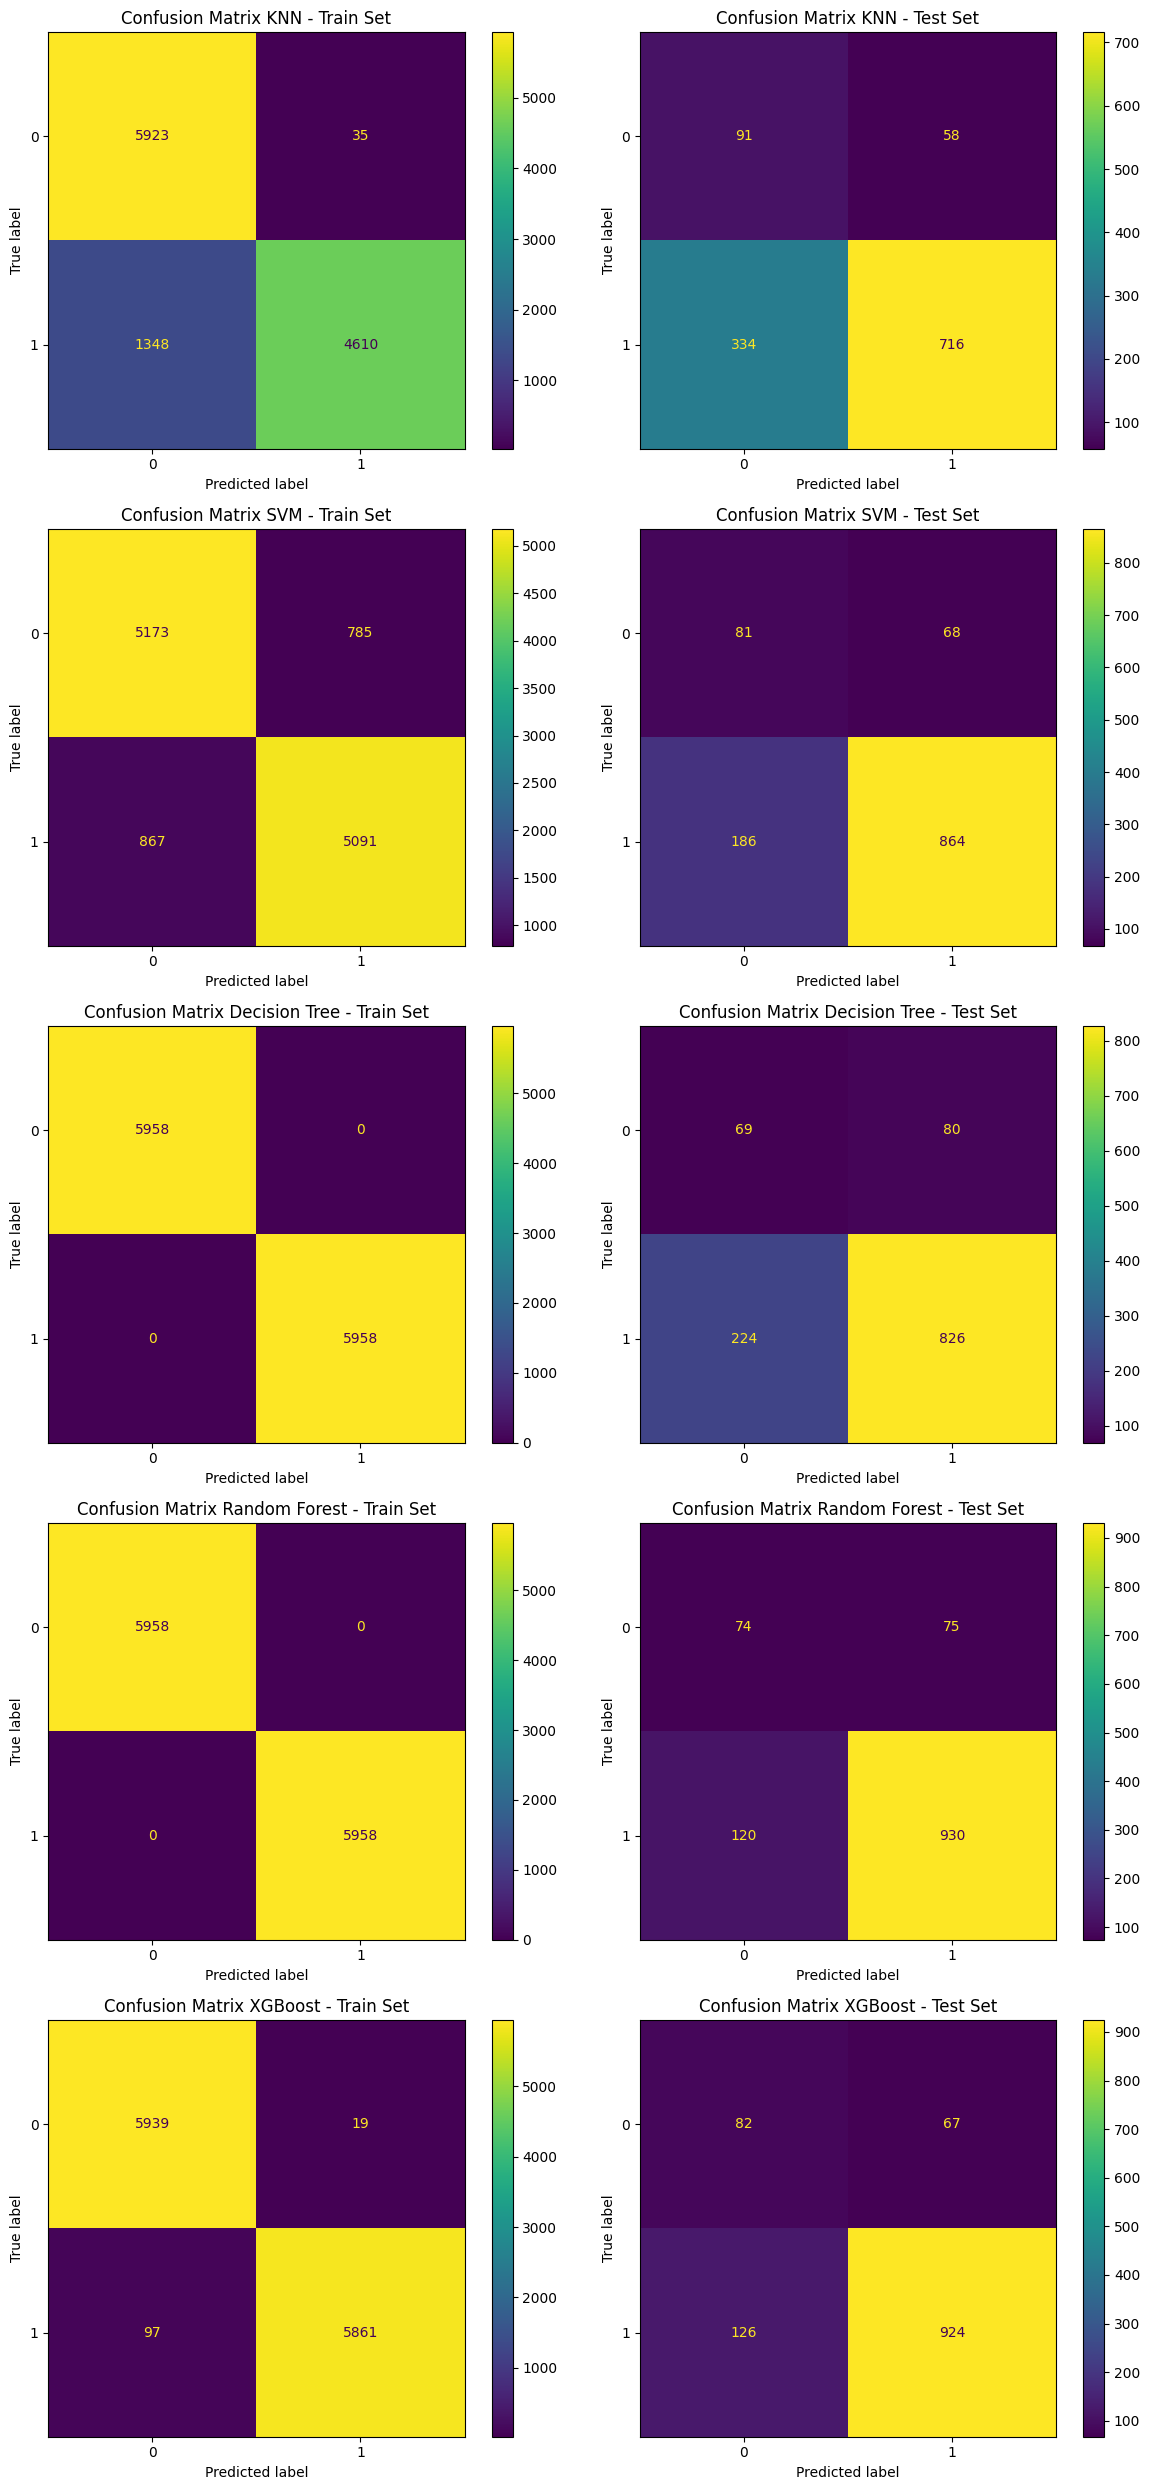

In [51]:
# Daftar model dan hasil prediksinya
models = {
    'KNN': {'train': confusion_matrix(y_train_balanced, y_pred_train_knn), 'test': confusion_matrix(y_test, y_pred_test_knn)},
    'SVM': {'train': confusion_matrix(y_train_balanced, y_pred_train_svm), 'test': confusion_matrix(y_test, y_pred_test_svm)},
    'Decision Tree': {'train': confusion_matrix(y_train_balanced, y_pred_train_detree), 'test': confusion_matrix(y_test, y_pred_test_detree)},
    'Random Forest': {'train': confusion_matrix(y_train_balanced, y_pred_train_ranfor), 'test': confusion_matrix(y_test, y_pred_test_ranfor)},
    'XGBoost': {'train': confusion_matrix(y_train_balanced, y_pred_train_xgb), 'test': confusion_matrix(y_test, y_pred_test_xgb)}
}

# Membuat figure dengan 5 baris dan 2 kolom
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 25))  # 5 baris dan 2 kolom

# Looping untuk menampilkan Confusion Matrix untuk setiap model
for i, (model_name, matrices) in enumerate(models.items()):
    # Plot Confusion Matrix untuk train set
    ConfusionMatrixDisplay(matrices['train']).plot(ax=ax[i, 0])
    ax[i, 0].set_title(f'Confusion Matrix {model_name} - Train Set')
    
    # Plot Confusion Matrix untuk test set
    ConfusionMatrixDisplay(matrices['test']).plot(ax=ax[i, 1])
    ax[i, 1].set_title(f'Confusion Matrix {model_name} - Test Set')

# Mengatur layout supaya lebih rapi
plt.tight_layout()
plt.show()


**Insight:**
- Model KNN:
    - Pada train set, KNN menghasilkan 5923 true negatives, 35 false positives, 4610 true positives, dan 1348 false negatives. KNN menunjukkan kesulitan dalam mengklasifikasikan kelas 1, dengan false negatives yang signifikan.
    - Pada test set, model KNN menghasilkan 91 true negatives, 58 false positives, 716 true positives, dan 334 false negatives. Ini menunjukkan bahwa model KNN memiliki kesulitan dalam menangani prediksi pada kelas 1 di data uji.

- Model SVM:
    - Pada train set, SVM menghasilkan 5173 true negatives, 785 false positives, 5091 true positives, dan 867 false negatives. Meskipun ada sejumlah kesalahan, performa pada kelas 1 lebih baik dibandingkan KNN.
    - Pada test set, model menghasilkan 81 true negatives, 68 false positives, 864 true positives, dan 186 false negatives. Model SVM memiliki performa yang lebih baik pada kelas 1 dibanding KNN pada data uji.

- Model Decision Tree:
    - Pada train set, Decision Tree overfitting dengan hasil sempurna, yaitu 5958 true negatives, 0 false positives, 5958 true positives, dan 0 false negatives, yang menandakan model menghafal data latih.
    - Pada test set, performa menurun dengan 69 true negatives, 80 false positives, 826 true positives, dan 224 false negatives, menunjukkan overfitting yang signifikan.

- Model Random Forest:
    - Pada train set, Random Forest juga overfitting, dengan 5958 true negatives, 0 false positives, 5958 true positives, dan 0 false negatives, mirip dengan Decision Tree.
    - Pada test set, model menghasilkan 74 true negatives, 75 false positives, 930 true positives, dan 120 false negatives. Random Forest menunjukkan generalisasi yang sedikit lebih baik dibanding Decision Tree.

- Model XGBoost:
    - Pada train set, XGBoost menghasilkan 5939 true negatives, 19 false positives, 5861 true positives, dan 97 false negatives. Model ini menunjukkan hasil yang lebih baik dalam menghindari overfitting dibanding Decision Tree dan Random Forest.
    - Pada test set, XGBoost menghasilkan 82 true negatives, 67 false positives, 924 true positives, dan 126 false negatives, menjadikannya model terbaik dalam hal generalisasi dibandingkan model lainnya.

**Kesimpulan:**
- KNN memiliki kesulitan dalam mengenali kelas 1, terutama terlihat dari banyaknya false negatives.
- SVM menunjukkan performa yang lebih stabil, meskipun masih terdapat kesalahan pada prediksi kelas 1.
- Decision Tree dan Random Forest mengalami overfitting yang jelas pada data latih, meskipun Random Forest sedikit lebih baik dalam generalisasi.
- XGBoost adalah model terbaik, dengan kemampuan generalisasi yang lebih baik dan kesalahan klasifikasi yang lebih sedikit dibandingkan model lain.


## Evaluasi dari Nilai Cross Validation

In [52]:
# List model names dan hasil f1 score cross validation dari setiap model
models = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
recall_vals = [recall_val_knn, recall_val_svm, recall_val_detree, recall_val_ranfor, recall_val_xgb]

# Inisialisasi dictionary untuk menyimpan hasilnya
results_dict = {
    'Model': [],
    'Cross Validation Recall - Mean': [],
    'Cross Validation Recall - Std': [],
    'Cross Validation Recall - Range (min)': [],
    'Cross Validation Recall - Range (max)': []
}

# Loop untuk menghitung nilai mean, std, dan range dari masing-masing model
for model_name, recall_scores in zip(models, recall_vals):
    mean_recall = recall_scores.mean()
    std_recall = recall_scores.std()
    range_min = mean_recall - std_recall
    range_max = mean_recall + std_recall
    
    # Append hasil perhitungan ke dictionary
    results_dict['Model'].append(model_name)
    results_dict['Cross Validation Recall - Mean'].append(mean_recall)
    results_dict['Cross Validation Recall - Std'].append(std_recall)
    results_dict['Cross Validation Recall - Range (min)'].append(range_min)
    results_dict['Cross Validation Recall - Range (max)'].append(range_max)

recall_default_scores = [
    recall_score(y_train_balanced, y_pred_train_knn),      
    recall_score(y_train_balanced, y_pred_train_svm),      
    recall_score(y_train_balanced, y_pred_train_detree),   
    recall_score(y_train_balanced, y_pred_train_ranfor),   
    recall_score(y_train_balanced, y_pred_train_xgb)       
]

# Konversi dictionary ke dataframe
df_cross_val_results = pd.DataFrame(results_dict)

# Menambahkan kolom 'F1-score Default' ke dataframe df_cross_val_results
df_cross_val_results['Recall-score Training'] = recall_default_scores

# Display dataframe hasil
df_cross_val_results


,Model,Cross Validation Recall - Mean,Cross Validation Recall - Std,Cross Validation Recall - Range (min),Cross Validation Recall - Range (max),Recall-score Training
0,KNN,0.664149,0.010666,0.653484,0.674815,0.773750
1,SVM,0.815542,0.008840,0.806702,0.824382,0.854481
2,Decision Tree,0.752098,0.009870,0.742228,0.761968,1.000000
3,Random Forest,0.868244,0.006400,0.861844,0.874644,1.000000
4,XGBoost,0.863209,0.010281,0.852928,0.873490,0.983719


**Insight:**
- KNN: Nilai recall pada cross-validation sebesar 0.6641 dengan standard deviation (std) 0.0107 menunjukkan performa yang cukup konsisten dalam generalisasi. Namun, terdapat perbedaan yang signifikan antara recall cross-validation dan recall pada training set (0.7738), yang mengindikasikan adanya overfitting di mana model bekerja jauh lebih baik pada data latih dibanding data validasi.
- SVM: Recall pada cross-validation sebesar 0.8155 dengan std 0.0088, yang menandakan performa yang stabil dan kemampuan generalisasi yang baik. Nilai recall pada training set (0.8545) hanya sedikit lebih tinggi dibanding cross-validation, menunjukkan bahwa SVM mampu menjaga keseimbangan antara performa pada data latih dan generalisasi pada data uji.
- Decision Tree: Memiliki recall yang cukup tinggi pada cross-validation sebesar 0.7521 dengan std 0.0099, menandakan performa yang stabil meskipun terdapat variasi. Namun, recall pada training set yang mencapai 1.0000 menunjukkan overfitting berat, di mana model "menghafal" data latih tanpa mampu menggeneralisasi dengan baik.
- Random Forest: Menunjukkan performa yang sangat baik dengan recall pada cross-validation sebesar 0.8682 dan std 0.0064, yang menunjukkan model ini sangat stabil. Meskipun recall pada training set mencapai 1.0000, yang mengindikasikan overfitting, model ini tetap menunjukkan kemampuan generalisasi yang cukup baik di data uji.
- XGBoost: Memberikan performa yang hampir setara dengan Random Forest dengan recall cross-validation sebesar 0.8632 dan std 0.0103, menunjukkan stabilitas yang baik. Meskipun recall pada training set mendekati sempurna (0.9837), model ini memiliki sedikit overfitting, tetapi tetap mampu menggeneralisasi dengan sangat baik pada data uji.

**Kesimpulan:**
- SVM, Random Forest, dan XGBoost menunjukkan performa yang baik dalam generalisasi, dengan XGBoost menjadi model yang memiliki keseimbangan terbaik antara performa di data training dan validasi.
- Decision Tree dan Random Forest cenderung overfitting pada data training, namun Random Forest masih memiliki performa yang cukup baik di data validasi.
- KNN memperlihatkan overfitting yang lebih jelas dibanding model lainnya.

`Dari hasil evaluasi yang dilakukan melalui metric-metric diatas, menjadikan XGBoost menjadi model yang paling baik untuk program ini.`

# Hyperparameter Tuning

Pada bagian ini akan dilakukan parameter tuning dari model terbaik yang sebelumnya sudah diuji, selanjutnya dilakukan prediksi terhadap data train dan data test untuk melakukan perbandingan dengan model sebelum dituning, evaluasi dilakukan dengan menggunakan metrics classification report, confusion matrix, cross validation dan score AUC.

In [53]:
# set parameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [4, 5, 6, 7],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [0.5, 0.7, 3],
    'gamma': [2,3,4],
}


xgb_gridcv = GridSearchCV(estimator=XGBClassifier(random_state=10),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

xgb_gridcv.fit(X_train_prep, y_train_balanced)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=0.5; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=3; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=2, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=3; total time=   0.1s
[CV] END colsamp

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [2, 3, 4], 'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [0.5, 0.7, 3]},
             scoring='recall', verbose=2)

## Best Parameter

In [54]:
# cek best parameter
xgb_gridcv.best_params_

{'colsample_bytree': 1.0,
 'gamma': 4,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 100,
 'scale_pos_weight': 3}

## Predict

In [55]:
# save model dengan parameter terbaik
xgb_gridcv_best = xgb_gridcv.best_estimator_

# predict test menggunakan model setelah tuning
y_pred_test_tuned = xgb_gridcv_best.predict(X_test_prep)

# predict train menggunakan model setelah tuning
y_pred_train_tuned = xgb_gridcv_best.predict(X_train_prep)

## Evaluasi Menggunakan Classification Report

In [56]:
# Dictionary berisi nama model dan hasil classification_report untuk train dan test
classification_reports = {
    'XGBoost': {'train': classification_report(y_train_balanced, y_pred_train_xgb, output_dict=True),
                'test': classification_report(y_test, y_pred_test_xgb, output_dict=True)},
    'XGBoost_tuned': {'train': classification_report(y_train_balanced, y_pred_train_tuned, output_dict=True),
                'test': classification_report(y_test, y_pred_test_tuned, output_dict=True)}
}

# Inisialisasi DataFrame untuk menyimpan metrik evaluasi
compare_metrics = pd.DataFrame()

# Looping untuk setiap model dan dataset (train/test)
for model_name, reports in classification_reports.items():
    for dataset_type in ['train', 'test']:
        # Mengambil hasil untuk setiap kelas 0 dan 1, serta macro avg dan weighted avg
        compare_metrics[f'{model_name} {dataset_type}'] = [
            reports[dataset_type]['0']['precision'],   # Precision Kelas 0
            reports[dataset_type]['1']['precision'],   # Precision Kelas 1
            reports[dataset_type]['0']['recall'],      # Recall Kelas 0
            reports[dataset_type]['1']['recall'],      # Recall Kelas 1
            reports[dataset_type]['0']['f1-score'],    # F1-Score Kelas 0
            reports[dataset_type]['1']['f1-score'],    # F1-Score Kelas 1
            reports[dataset_type]['accuracy'],         # Accuracy
            reports[dataset_type]['macro avg']['precision'],  # Precision Macro Avg
            reports[dataset_type]['macro avg']['recall'],     # Recall Macro Avg
            reports[dataset_type]['macro avg']['f1-score'],   # F1-Score Macro Avg
            reports[dataset_type]['weighted avg']['precision'],  # Precision Weighted Avg
            reports[dataset_type]['weighted avg']['recall'],     # Recall Weighted Avg
            reports[dataset_type]['weighted avg']['f1-score']    # F1-Score Weighted Avg
        ]

# Menambahkan index untuk setiap metrik
compare_metrics.index = [
    'Precision Class 0', 'Precision Class 1',
    'Recall Class 0', 'Recall Class 1',
    'F1-Score Class 0', 'F1-Score Class 1',
    'Accuracy', 'Precision Macro Avg', 
    'Recall Macro Avg', 'F1-Score Macro Avg', 
    'Precision Weighted Avg', 'Recall Weighted Avg', 
    'F1-Score Weighted Avg'
]

# Tampilkan DataFrame
compare_metrics


,XGBoost train,XGBoost test,XGBoost_tuned train,XGBoost_tuned test
Precision Class 0,0.983930,0.394231,0.958361,0.543307
Precision Class 1,0.996769,0.932392,0.774869,0.925373
Recall Class 0,0.996811,0.550336,0.718530,0.463087
Recall Class 1,0.983719,0.880000,0.968781,0.944762
F1-Score Class 0,0.990328,0.459384,0.821295,0.500000
F1-Score Class 1,0.990201,0.905439,0.861043,0.934967
Accuracy,0.990265,0.839033,0.843656,0.884904
Precision Macro Avg,0.990349,0.663311,0.866615,0.734340
Recall Macro Avg,0.990265,0.715168,0.843656,0.703925
F1-Score Macro Avg,0.990265,0.682411,0.841169,0.717484


**Insight:**
- XGBoost (Train Set vs. Test Set):
    - Recall Kelas 0: Sangat tinggi pada train set (0.9968), namun mengalami penurunan yang signifikan pada test set (0.5503). Ini menunjukkan bahwa model mengalami overfitting pada data latih, di mana ia mempelajari kelas 0 dengan baik tetapi gagal menangani kelas ini dengan baik pada data uji.
    - Recall Kelas 1: Stabil dan sangat baik di train set (0.9837) dan test set (0.8800), menunjukkan bahwa model lebih mampu memprediksi kelas 1 dengan baik pada kedua set data, meskipun terdapat sedikit penurunan di test set.
    - Recall Macro Avg: Rata-rata recall antara kedua kelas di train set sangat tinggi (0.9903), namun turun pada test set (0.7152), yang mengindikasikan bahwa performa model pada test set jauh lebih rendah terutama karena masalah dengan kelas 0.

- XGBoost Tuned (Train Set vs. Test Set):
    - Recall Kelas 0: Setelah tuning, recall pada train set menurun menjadi 0.7185, dan pada test set menjadi 0.4631, yang menunjukkan peningkatan generalisasi dibandingkan model sebelumnya, meskipun recall pada test set masih cukup rendah untuk kelas 0.
    - Recall Kelas 1: Recall pada kelas 1 meningkat di train set setelah tuning menjadi 0.9688, dan pada test set menjadi 0.9448, menandakan bahwa tuning membuat model lebih baik dalam mengenali kelas 1 secara konsisten di kedua set data.
    - Recall Macro Avg: Setelah tuning, recall macro avg di train set menjadi 0.8437, dan di test set turun sedikit menjadi 0.7039, namun menunjukkan bahwa model yang telah dituning memiliki generalization yang lebih baik dibandingkan XGBoost sebelumnya.

## Evaluasi Menggunakan Confusion Matrix

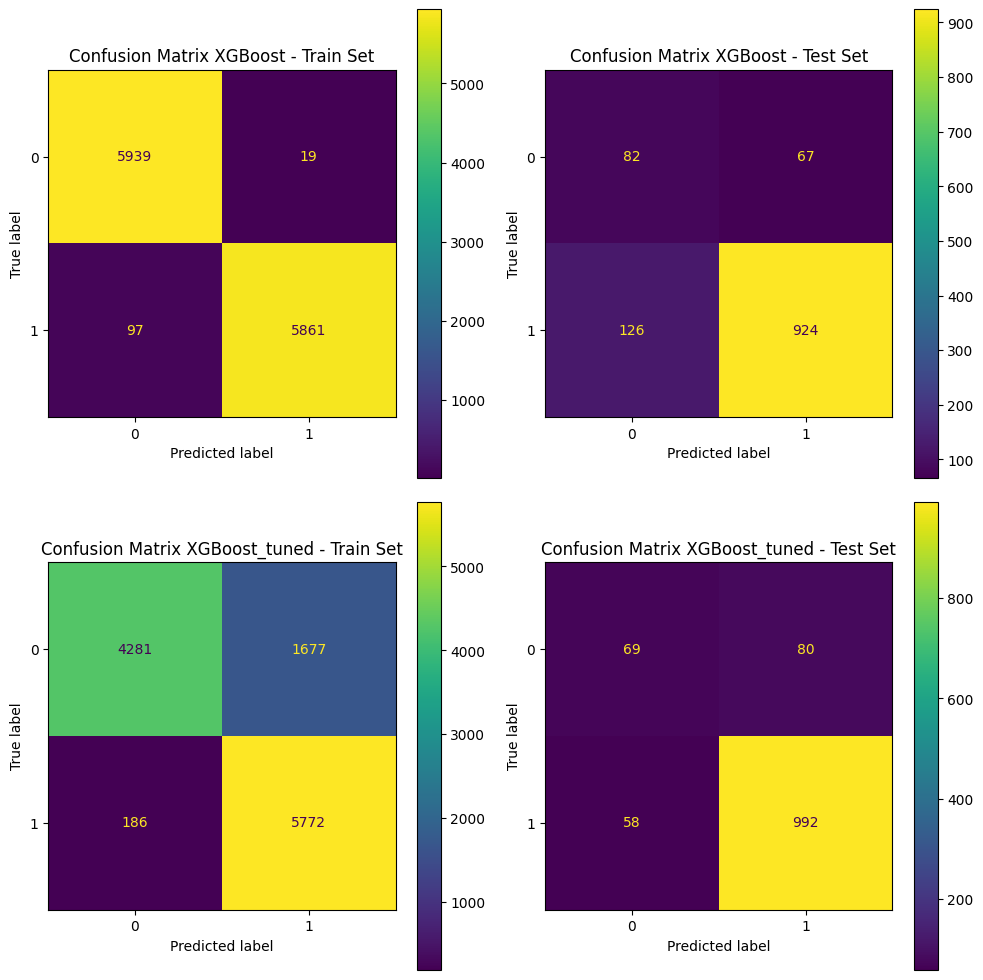

In [57]:
# Daftar model dan hasil prediksinya
models = {
    'XGBoost': {'train': confusion_matrix(y_train_balanced, y_pred_train_xgb), 'test': confusion_matrix(y_test, y_pred_test_xgb)},
    'XGBoost_tuned': {'train': confusion_matrix(y_train_balanced, y_pred_train_tuned), 'test': confusion_matrix(y_test, y_pred_test_tuned)}
}

# Membuat figure dengan 2 baris dan 2 kolom
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # 5 baris dan 2 kolom

# Looping untuk menampilkan Confusion Matrix untuk setiap model
for i, (model_name, matrices) in enumerate(models.items()):
    # Plot Confusion Matrix untuk train set
    ConfusionMatrixDisplay(matrices['train']).plot(ax=ax[i, 0])
    ax[i, 0].set_title(f'Confusion Matrix {model_name} - Train Set')
    
    # Plot Confusion Matrix untuk test set
    ConfusionMatrixDisplay(matrices['test']).plot(ax=ax[i, 1])
    ax[i, 1].set_title(f'Confusion Matrix {model_name} - Test Set')

# Mengatur layout supaya lebih rapi
plt.tight_layout()
plt.show()

**Insight:**
- XGBoost (Sebelum Tuning)
    - Train Set: model hampir sempurna dalam mengenali kedua kelas, dengan FN dan FP yang sangat kecil, menunjukkan overfitting. Model belajar data latih dengan sangat baik, tetapi ini bisa jadi masalah ketika diterapkan pada data yang tidak dilatih.
    - Test Set: performa model memburuk, terutama dalam mengenali kelas 0 (class imbalance terlihat pada FN dan FP yang tinggi). Tingginya FN dan FP pada test set ini adalah tanda model overfitting, karena model gagal mengenali pola pada data uji yang belum pernah dilihat sebelumnya.
- XGBoost (Setelah Tuning)
    - Train Set: model menjadi lebih seimbang, dengan adanya peningkatan jumlah FP dan FN yang menandakan bahwa model tidak lagi "menghafal" data train set. Hal ini menunjukkan bahwa model telah dikurangi overfitting-nya dan lebih baik dalam generalisasi.
    - Test Set: performa model membaik, terutama dalam mengenali kelas 1 dengan FN yang lebih kecil dibandingkan sebelum tuning. Namun, model masih memiliki sedikit kesulitan dalam mengenali kelas 0, terlihat dari FP yang cukup tinggi.

**Kesimpulan:**
- Sebelum Tuning: XGBoost menunjukkan overfitting signifikan, di mana performa pada data latih sangat baik, tetapi buruk di data uji, terutama dalam mengenali kelas 0 pada test set.
- Setelah Tuning: Performa model menjadi lebih stabil dan generalisasi meningkat, terutama pada kelas 1 di test set. Namun, model masih sedikit kesulitan dalam mengenali kelas 0 pada test set, meskipun hasil ini lebih baik dibandingkan sebelum tuning. Tuning berhasil mengurangi overfitting dan membuat model lebih siap untuk menangani data uji.

## Evaluasi Menggunakan Cross Validation

In [58]:
# Mengambil hasil dari GridSearchCV
cv_results = pd.DataFrame(xgb_gridcv.cv_results_)

# Menghitung mean dan std dari skor
mean_score = cv_results['mean_test_score'].mean()
std_score = cv_results['std_test_score'].mean()

# Menampilkan hasil
print(f'Mean Test Score: {mean_score:.4f}')
print(f'Standard Deviation of Test Score: {std_score:.4f}')

Mean Test Score: 0.7985
Standard Deviation of Test Score: 0.0100


**Insight:**
Kinerja Model yang Baik: Akurasi di atas 79% bisa dianggap cukup baik.

Peluang untuk Peningkatan: Meskipun model menunjukkan kinerja yang baik, masih ada ruang untuk peningkatan, terutama jika diperlukan akurasi yang lebih tinggi.

## Evaluasi Menggunakan Score AUC

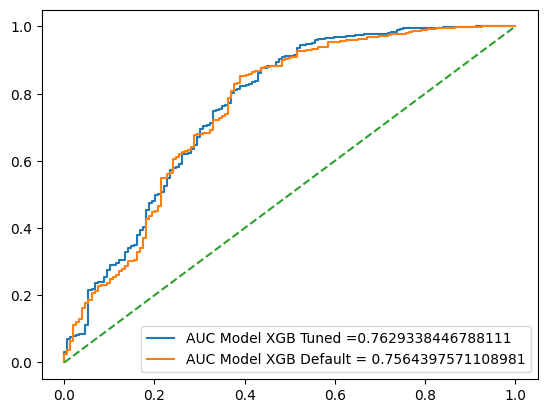

In [59]:
y_pred_test_proba = xgb_gridcv_best.predict_proba(X_test_prep)[:,1]
fpr_grid, tpr_grid, _ = roc_curve(y_test, y_pred_test_proba)
auc_grid_test = roc_auc_score(y_test, y_pred_test_proba)
y_pred_default_proba = xgb.predict_proba(X_test_prep)[:, 1]

# Hitung FPR, TPR untuk ROC curve
fpr_def, tpr_def, _ = roc_curve(y_test, y_pred_default_proba)

# Hitung AUC score dengan benar
auc_grid_test_d = roc_auc_score(y_test, y_pred_default_proba)
# Plot ROC-AUC Curve

plt.figure(0).clf()
plt.plot(fpr_grid, tpr_grid, label='AUC Model XGB Tuned =' + str(auc_grid_test))
plt.plot(fpr_def, tpr_def, label='AUC Model XGB Default = ' + str(auc_grid_test_d))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)

**Insight:**
- Perbandingan AUC:
    - XGBoost Default: AUC sebesar 0.7564, menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
    - XGBoost Tuned: AUC meningkat menjadi 0.7629, yang menunjukkan bahwa tuning model berhasil meningkatkan performa dalam membedakan antara kelas, meskipun peningkatannya relatif kecil.
- Interpretasi AUC:
    - Nilai AUC di kedua model berada di kisaran 0.75-0.76, yang mengindikasikan performa yang baik (meskipun belum luar biasa) dalam membedakan kelas. Semakin mendekati 1, semakin baik model dalam membedakan antara kelas positif dan negatif.
    - XGBoost Tuned memiliki kurva ROC yang lebih tinggi di sebagian besar wilayah, yang menunjukkan peningkatan kemampuan prediksi terutama di rentang sensitivitas menengah.

**Kesimpulan:**

Tuning model XGBoost berhasil meningkatkan performa dalam diskriminasi kelas dengan meningkatkan AUC. Meskipun peningkatan ini kecil, hal tersebut menunjukkan bahwa penyesuaian hyperparameter mampu meningkatkan kemampuan generalisasi model.

# Model Saving

In [60]:
# menyimpan model
with open('model.pkl', 'wb') as file_1:
    joblib.dump(xgb_gridcv_best, file_1)

# menyimpan metode preprosesing
with open('preproc.pkl', 'wb') as file_2:
    joblib.dump(preproc_pipeline, file_2)

# Pengambilan Keputusan untuk Model dan Bisnis

Model XGBoost yang dituning menunjukkan bahwa tuning berhasil meningkatkan kemampuan model dalam membedakan antara pelanggan yang akan melakukan konversi dan yang tidak. Sehingga selanjutnya dilakukan beberapa pendekatan dalam strategi bisnis untuk menciptakan dan meningkatkan conversion.

Berdasarkan hasil dari eksplorasi data, adapun hal yang bisa diimplementasikan dalam mencapai tujuan bisnis:
- Investasi lebih banyak pada channel referral dan PPC yang menunjukkan hasil terbaik. Pertimbangkan untuk meningkatkan anggaran atau strategi dalam kedua channel ini untuk memaksimalkan hasil konversi. Bisa menggunakan jasa influencer atau referal code untuk mendapatkan diskon. Bisa juga analisa hasil PPC dari campaign yang sudah dilakukan dan melakukan optimisasi.
- Tinjau kembali strategi pemasaran email. Mungkin perlu dilakukan segmentasi lebih baik atau pengujian konten untuk meningkatkan efektivitas karena adspendnya sedikit lebih tinggi dari channel SEO tetapi hasil conversionnya sedikit lebih kecil dari channel SEO.
- Dengan wanita menjadi demografis yang lebih cenderung melakukan konversi, bisa dipertimbangkan untuk mengembangkan kampanye yang secara khusus ditargetkan kepada wanita yang sudah terprediksi untuk melakukan conversion.
- Selain itu, bisa juga dipertimbangkan untuk menciptakan produk atau promosi yang lebih sesuai dengan preferensi usia di kategori muda yang terprediksi melakukan conversion.
- Karena pelanggan yang melakukan konversi memiliki waktu di situs yang lebih tinggi, upayakan untuk meningkatkan keterlibatan pengguna di situs Anda, mungkin melalui konten interaktif atau penawaran khusus. Agar customer yang terprediksi melakukan conversion atau tidak tetap dapat menikmati kenyamanan dalam eksplor website.
- Setelah mengetahui customer akan conert atau tidak, bisa disesuaikan dengan strategi per masing-masing tipe campaign agar bisa lebih maksimal